In [3]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys, Draw
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Lire les SMILES depuis le fichier
with open("ligands.txt", "r") as f:
    smiles_list = [line.strip() for line in f if line.strip()]

# 2. Convertir en objets Mol RDKit
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# 3. Supprimer les molécules non valides
valid_mols = [mol for mol in mols if mol is not None]
valid_smiles = [smi for mol, smi in zip(mols, smiles_list) if mol is not None]


In [4]:
# 4. Générer les MACCS fingerprints
fps = [MACCSkeys.GenMACCSKeys(mol) for mol in valid_mols]
fps_array = np.array([fp.ToList() for fp in fps])

# 5. Réduction de dimension par PCA
pca = PCA(n_components=2)
fps_pca = pca.fit_transform(fps_array)

# 6. Clustering hiérarchique (Agglomerative)
clusterer = AgglomerativeClustering(n_clusters=4)
labels = clusterer.fit_predict(fps_array)

# 7. Dataframe pour visualisation
df = pd.DataFrame(fps_pca, columns=["PC1", "PC2"])
df["SMILES"] = valid_smiles
df["Cluster"] = labels.astype(str)


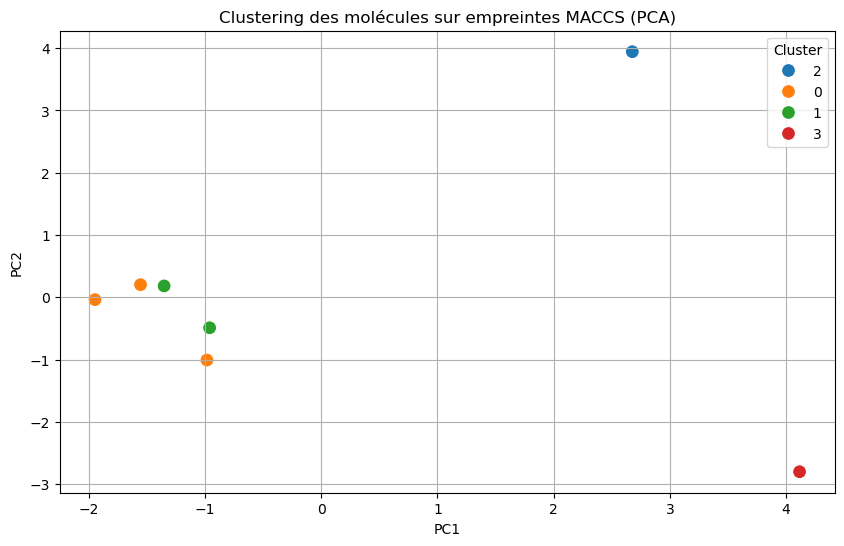

In [5]:
# 8. Affichage PCA avec clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=100)
plt.title("Clustering des molécules sur empreintes MACCS (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [6]:
# 9. Sauvegarder les clusters dans un fichier CSV
df.to_csv("clusters_maccs.csv", index=False)
print("Fichier 'clusters_maccs.csv' exporté.")


Fichier 'clusters_maccs.csv' exporté.


Cluster 0 - exemples :


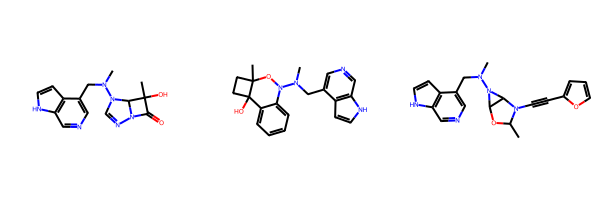

Cluster 1 - exemples :


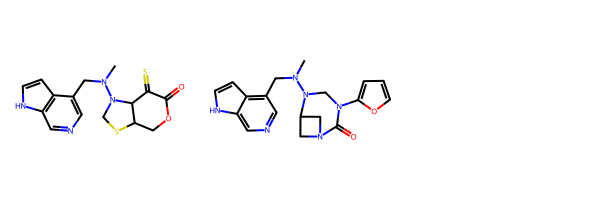

Cluster 2 - exemples :


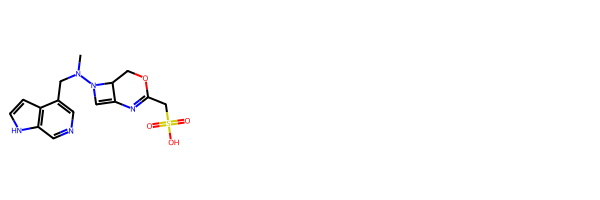

Cluster 3 - exemples :


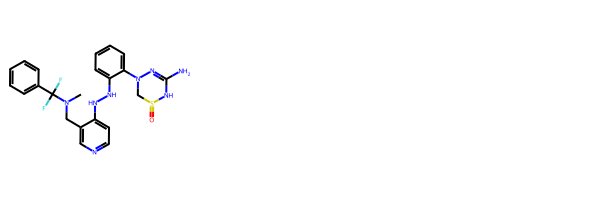

In [7]:
# 10. Affichage d'exemples de molécules par cluster
from IPython.display import display

n_per_cluster = 3  # nombre de molécules par cluster à afficher
for clust in sorted(df['Cluster'].unique()):
    sub_df = df[df['Cluster'] == clust].head(n_per_cluster)
    mols_to_draw = [Chem.MolFromSmiles(smi) for smi in sub_df["SMILES"]]
    print(f"Cluster {clust} - exemples :")
    display(Draw.MolsToGridImage(mols_to_draw, molsPerRow=3, subImgSize=(200, 200)))
